In [ ]:
! pip install statsforecast utilsforecast

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsforecast.models import ETS, AutoETS
from statsforecast.core import StatsForecast

warnings.filterwarnings("ignore")

In [ ]:
STORE_ID = 'STORE_1'

In [ ]:
sales = pd.read_csv('data/shop_sales.csv')

store_sales = sales[sales['store_id']==STORE_ID]
display(store_sales.head())
display(sales.info())

,item_id,store_id,date_id,cnt
54570,STORE_1_064,STORE_1,1,0
54571,STORE_1_064,STORE_1,2,1
54572,STORE_1_064,STORE_1,3,0
54573,STORE_1_064,STORE_1,4,0
54574,STORE_1_064,STORE_1,5,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81855 entries, 0 to 81854
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   81855 non-null  object
 1   store_id  81855 non-null  object
 2   date_id   81855 non-null  int64 
 3   cnt       81855 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.5+ MB


None

In [ ]:
calendar = pd.read_csv('data/shop_sales_dates.csv')

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,2,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,3,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,0,1,1
4,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,5,1,1,0


In [ ]:
store_sales = store_sales\
                .merge(calendar[['date', 'date_id']],
                       how='left',
                       on='date_id')\
                .drop(['date_id', 'store_id'], axis=1)
store_sales['date'] = pd.to_datetime(store_sales['date'])
store_sales.head()

,item_id,cnt,date
0,STORE_1_064,0,2011-01-29
1,STORE_1_064,1,2011-01-30
2,STORE_1_064,0,2011-01-31
3,STORE_1_064,0,2011-02-01
4,STORE_1_064,0,2011-02-02


In [ ]:
date_info_dict = {
    'item_id': [],
    'date_cnt': [],
    'date_min': [],
    'date_max': [],
    'date_nunique': []
}
for item in store_sales['item_id'].unique():
    data = store_sales[store_sales['item_id']==item]
    date_info_dict['item_id'].append(item)
    date_info_dict['date_cnt'].append(len(data))
    date_info_dict['date_min'].append(data['date'].min())
    date_info_dict['date_max'].append(data['date'].max())
    date_info_dict['date_nunique'].append(data['date'].nunique())


date_info = pd.DataFrame.from_dict(date_info_dict)
date_info

,item_id,date_cnt,date_min,date_max,date_nunique
0,STORE_1_064,1819,2011-01-29,2016-01-21,1819
1,STORE_1_065,1819,2011-01-29,2016-01-21,1819
2,STORE_1_325,1819,2011-01-29,2016-01-21,1819
3,STORE_1_376,1819,2011-01-29,2016-01-21,1819
4,STORE_1_090,1819,2011-01-29,2016-01-21,1819
5,STORE_1_252,1819,2011-01-29,2016-01-21,1819
6,STORE_1_339,1819,2011-01-29,2016-01-21,1819
7,STORE_1_546,1819,2011-01-29,2016-01-21,1819
8,STORE_1_547,1819,2011-01-29,2016-01-21,1819
9,STORE_1_555,1819,2011-01-29,2016-01-21,1819


In [ ]:
start_date = '2015-11-21'
end_date = '2016-01-21'
valid_split = len(pd.date_range(start_date, end_date))

val_df = store_sales.groupby('item_id').tail(valid_split)
train_df = store_sales.drop(val_df.index)

In [ ]:
train_df.groupby('item_id').size()

item_id
STORE_1_064    1757
STORE_1_065    1757
STORE_1_090    1757
STORE_1_252    1757
STORE_1_325    1757
STORE_1_339    1757
STORE_1_376    1757
STORE_1_546    1757
STORE_1_547    1757
STORE_1_555    1757
STORE_1_584    1757
STORE_1_586    1757
STORE_1_587    1757
STORE_1_714    1757
STORE_1_727    1757
dtype: int64

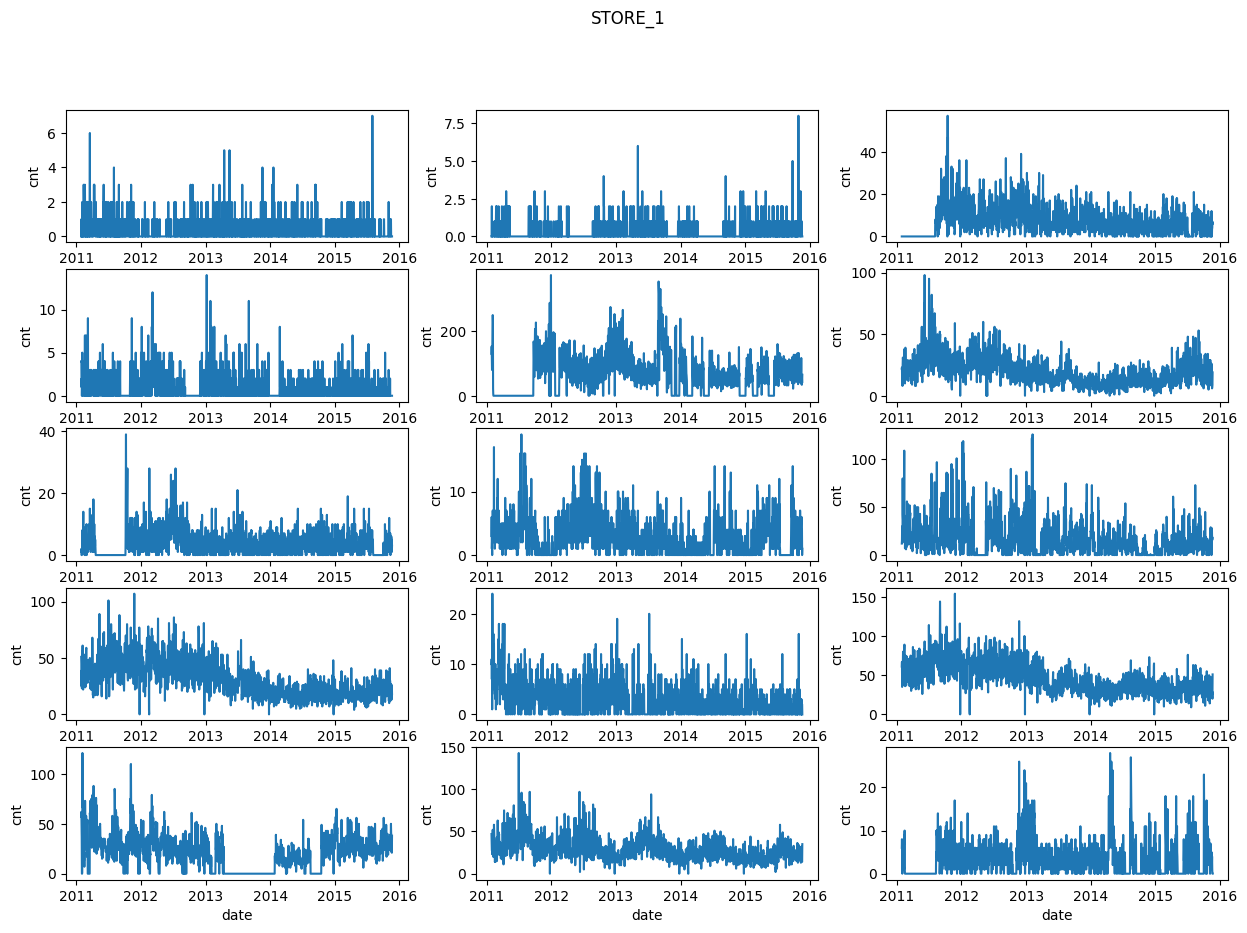

In [ ]:
fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(train_df['item_id'].unique()):
    data = train_df[train_df['item_id']==art]
    data.set_index('date')
    sns.lineplot(data=data,
                 x='date',y='cnt',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

In [ ]:
train_df = train_df.rename(columns={'item_id': 'unique_id',
                                    'cnt': 'y',
                                    'date': 'ds'})
val_df = val_df.rename(columns={'item_id': 'unique_id',
                                'cnt': 'y',
                                'date': 'ds'})

In [ ]:
unique_items = train_df['unique_id'].unique().tolist()

In [ ]:
val_df = val_df.set_index('unique_id')
train_df = train_df.set_index('unique_id')

In [ ]:
fcst = StatsForecast(df=train_df,
                     models=[ETS(season_length=14, model='ZZA')],
                     freq='D', n_jobs=-1)
Y_hat_df = fcst.forecast(h=7, fitted=True)
Y_fitted_df = fcst.forecast_fitted_values()

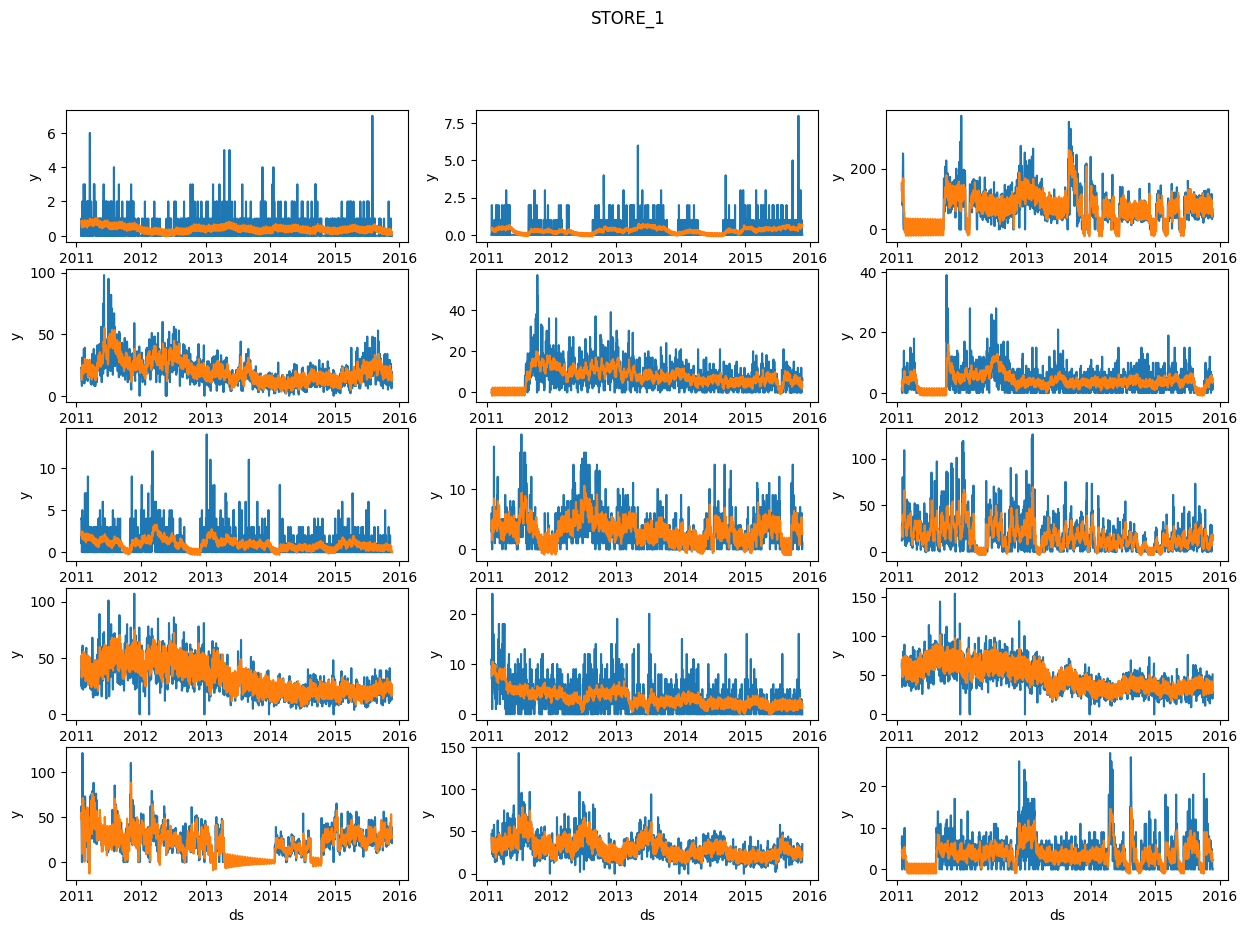

In [ ]:
fig,ax = plt.subplots(5,3,figsize=(15,10))

Y_fitted_df = Y_fitted_df.reset_index()
for i, art in enumerate(Y_fitted_df['unique_id'].unique()):
    data = Y_fitted_df[Y_fitted_df['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='ETS',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

In [ ]:
Y_hat_df = fcst.forecast(h=7, fitted=True).reset_index()
Y_hat_df = Y_hat_df.merge(val_df, how='left', on=['unique_id', 'ds'])

In [ ]:
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mae

metrics = [mape, mae]
eval_res = evaluate(Y_hat_df, metrics=metrics)

In [ ]:
eval_res

,unique_id,metric,ETS
0,STORE_1_064,mape,0.192678
1,STORE_1_065,mape,0.000000
2,STORE_1_090,mape,0.430203
3,STORE_1_252,mape,0.561800
4,STORE_1_325,mape,0.366539
5,STORE_1_339,mape,0.258564
6,STORE_1_376,mape,0.096218
7,STORE_1_546,mape,0.317981
8,STORE_1_547,mape,0.362854
9,STORE_1_555,mape,0.210526


In [ ]:
eval_res.groupby('metric').mean('ETS')

,ETS
metric,
mae,7.467139
mape,0.317913


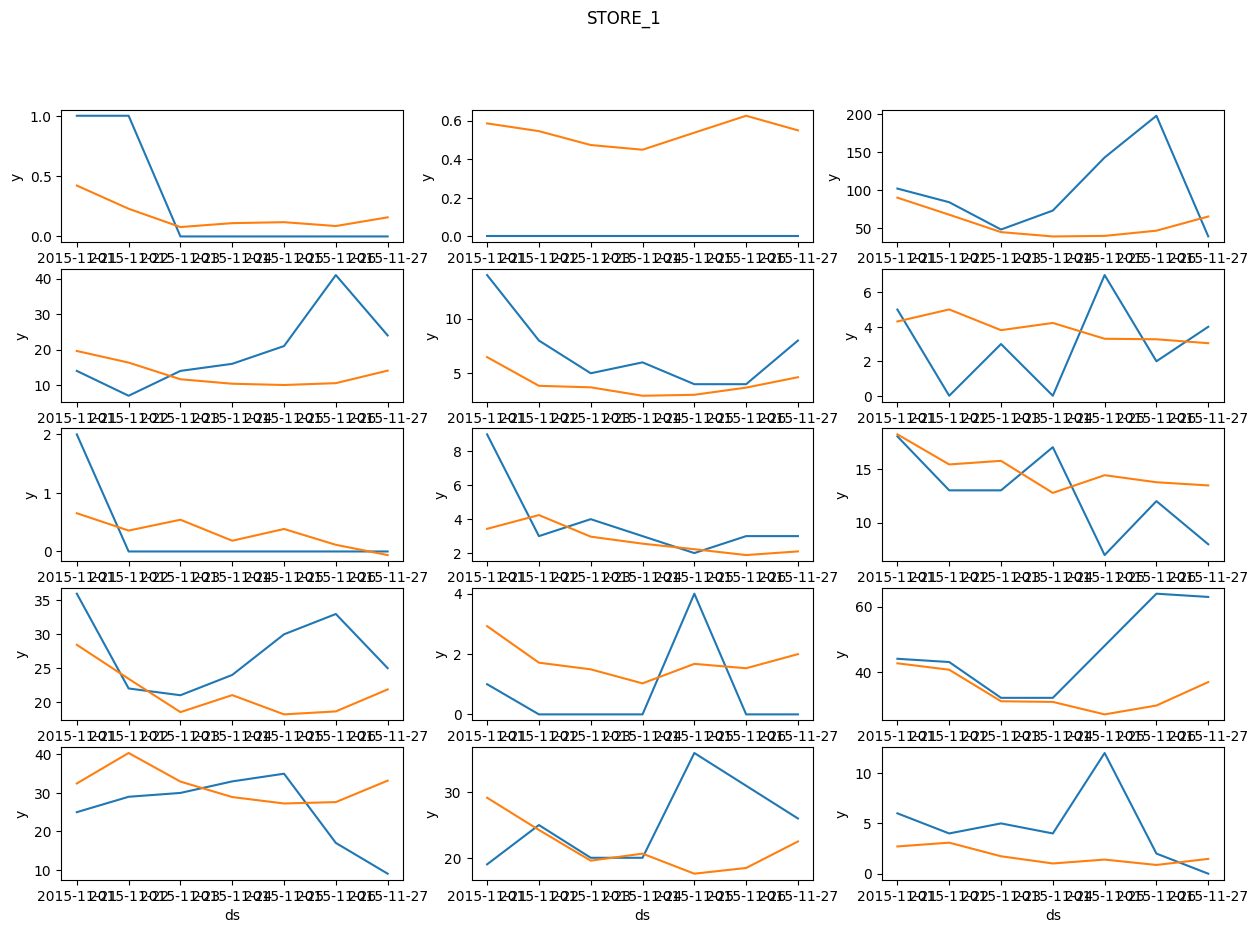

In [ ]:
fig,ax = plt.subplots(5,3,figsize=(15,10))

Y_hat_df = Y_hat_df.reset_index()
for i, art in enumerate(Y_hat_df['unique_id'].unique()):
    data = Y_hat_df[Y_hat_df['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='ETS',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

,ETS
metric,
mae,6.900310
mape,0.393245


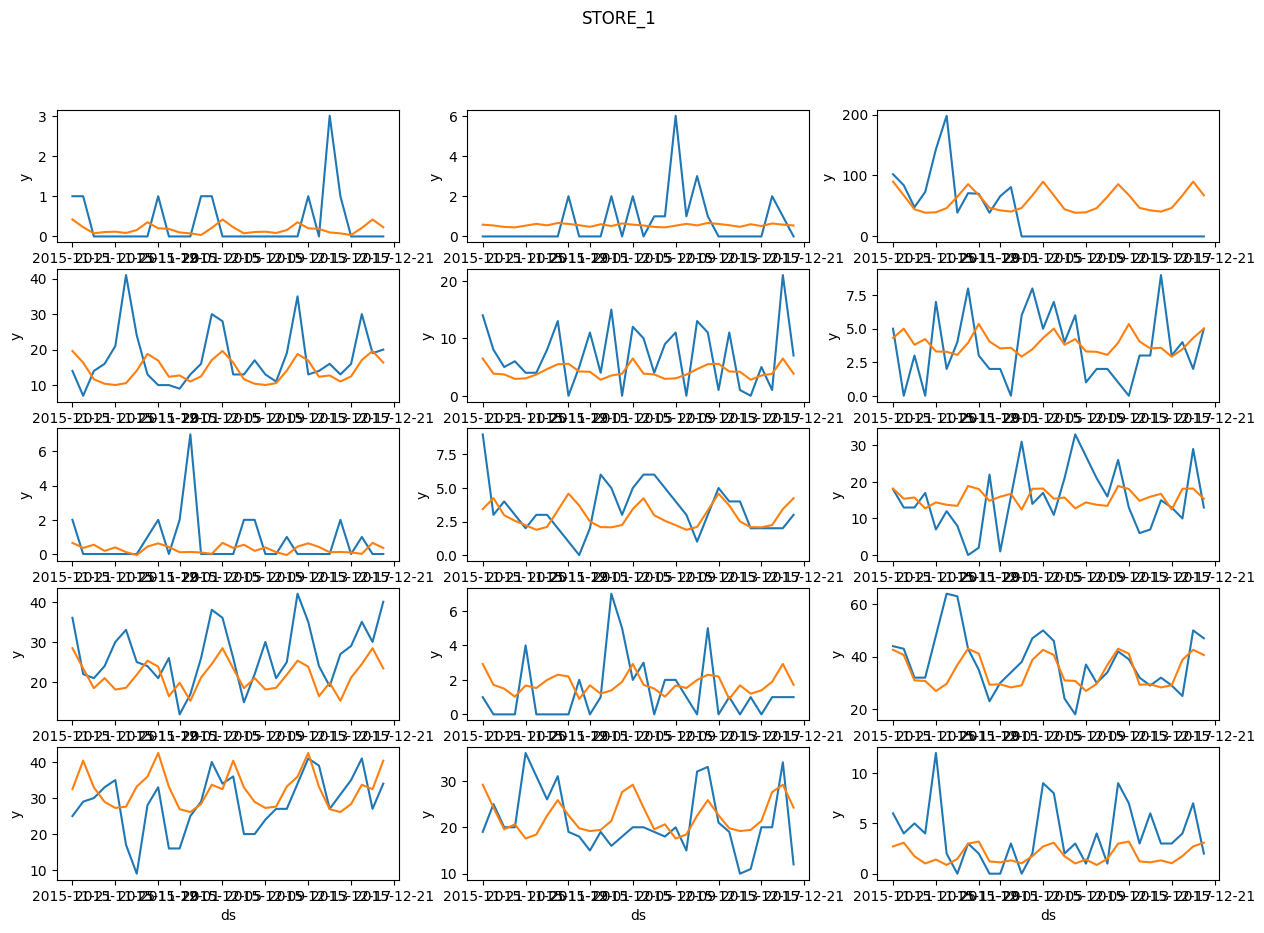

In [ ]:
Y_hat_df_m = fcst.forecast(h=30, fitted=True).reset_index()
Y_hat_df_m = Y_hat_df_m.merge(val_df, how='left', on=['unique_id', 'ds'])

eval_res_m = evaluate(Y_hat_df_m, metrics=metrics)
display(eval_res_m.groupby('metric').mean('ETS'))

fig,ax = plt.subplots(5,3,figsize=(15,10))

Y_hat_df_m = Y_hat_df_m.reset_index()
for i, art in enumerate(Y_hat_df_m['unique_id'].unique()):
    data = Y_hat_df_m[Y_hat_df_m['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='ETS',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

In [ ]:
Y_hat_df_k = fcst.forecast(h=valid_split, fitted=True).reset_index()
Y_hat_df_k = Y_hat_df_k.merge(val_df, how='left', on=['unique_id', 'ds'])

eval_res_k = evaluate(Y_hat_df_k, metrics=metrics)
display(eval_res_k.groupby('metric').mean('ETS'))

Y_hat_df_k = Y_hat_df_k.reset_index()
for i, art in enumerate(Y_hat_df_k['unique_id'].unique()):
    data = Y_hat_df_k[Y_hat_df_k['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='ETS',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

,ETS
metric,
mae,6.850223
mape,0.438548


<Figure size 640x480 with 0 Axes>

In [ ]:
fcst = StatsForecast(df=train_df,
                     models=[AutoETS(season_length=14, model='ZZZ')],
                     freq='D', n_jobs=-1)
Y_hat_df = fcst.forecast(h=7, fitted=True)
Y_fitted_df = fcst.forecast_fitted_values()

In [ ]:
Y_fitted_df = Y_fitted_df.reset_index()
eval_res = evaluate(Y_fitted_df, metrics=metrics)
display(eval_res.groupby('metric').mean('AutoETS'))

,AutoETS
metric,
mae,5.453604
mape,0.419555


In [ ]:
fcst = StatsForecast(df=train_df,
                     models=[AutoETS(season_length=14, model='ZZA')],
                     freq='D', n_jobs=-1)
Y_hat_df = fcst.forecast(h=7, fitted=True)
Y_fitted_df = fcst.forecast_fitted_values()

In [ ]:
Y_fitted_df = Y_fitted_df.reset_index()
eval_res = evaluate(Y_fitted_df, metrics=metrics)
display(eval_res.groupby('metric').mean('AutoETS'))

,AutoETS
metric,
mae,5.453615
mape,0.419411


In [ ]:
fcst = StatsForecast(df=train_df,
                     models=[AutoETS(season_length=14, model='ZAA')],
                     freq='D', n_jobs=-1)
Y_hat_df = fcst.forecast(h=7, fitted=True)
Y_fitted_df = fcst.forecast_fitted_values()

In [ ]:
Y_fitted_df = Y_fitted_df.reset_index()
eval_res = evaluate(Y_fitted_df, metrics=metrics)
display(eval_res.groupby('metric').mean('AutoETS'))

,AutoETS
metric,
mae,5.453998
mape,0.419152


In [ ]:
fcst = StatsForecast(df=train_df,
                     models=[AutoETS(season_length=7, model='ZZA')],
                     freq='D', n_jobs=-1)
Y_hat_df = fcst.forecast(h=7, fitted=True)
Y_fitted_df = fcst.forecast_fitted_values()

Y_fitted_df = Y_fitted_df.reset_index()
eval_res = evaluate(Y_fitted_df, metrics=metrics)
display(eval_res.groupby('metric').mean('AutoETS'))

,AutoETS
metric,
mae,5.386708
mape,0.419520


In [ ]:
fcst = StatsForecast(df=train_df,
                     models=[AutoETS(season_length=30, model='ZZA')],
                     freq='D', n_jobs=-1)
Y_hat_df = fcst.forecast(h=7, fitted=True)
Y_fitted_df = fcst.forecast_fitted_values()

Y_fitted_df = Y_fitted_df.reset_index()
eval_res = evaluate(Y_fitted_df, metrics=metrics)
display(eval_res.groupby('metric').mean('AutoETS'))

,AutoETS
metric,
mae,6.624928
mape,0.457025


In [ ]:
fcst = StatsForecast(df=train_df,
                     models=[AutoETS(season_length=14, model='ZAA')],
                     freq='D', n_jobs=-1)
Y_hat_df = fcst.forecast(h=7, fitted=True)
Y_fitted_df = fcst.forecast_fitted_values()

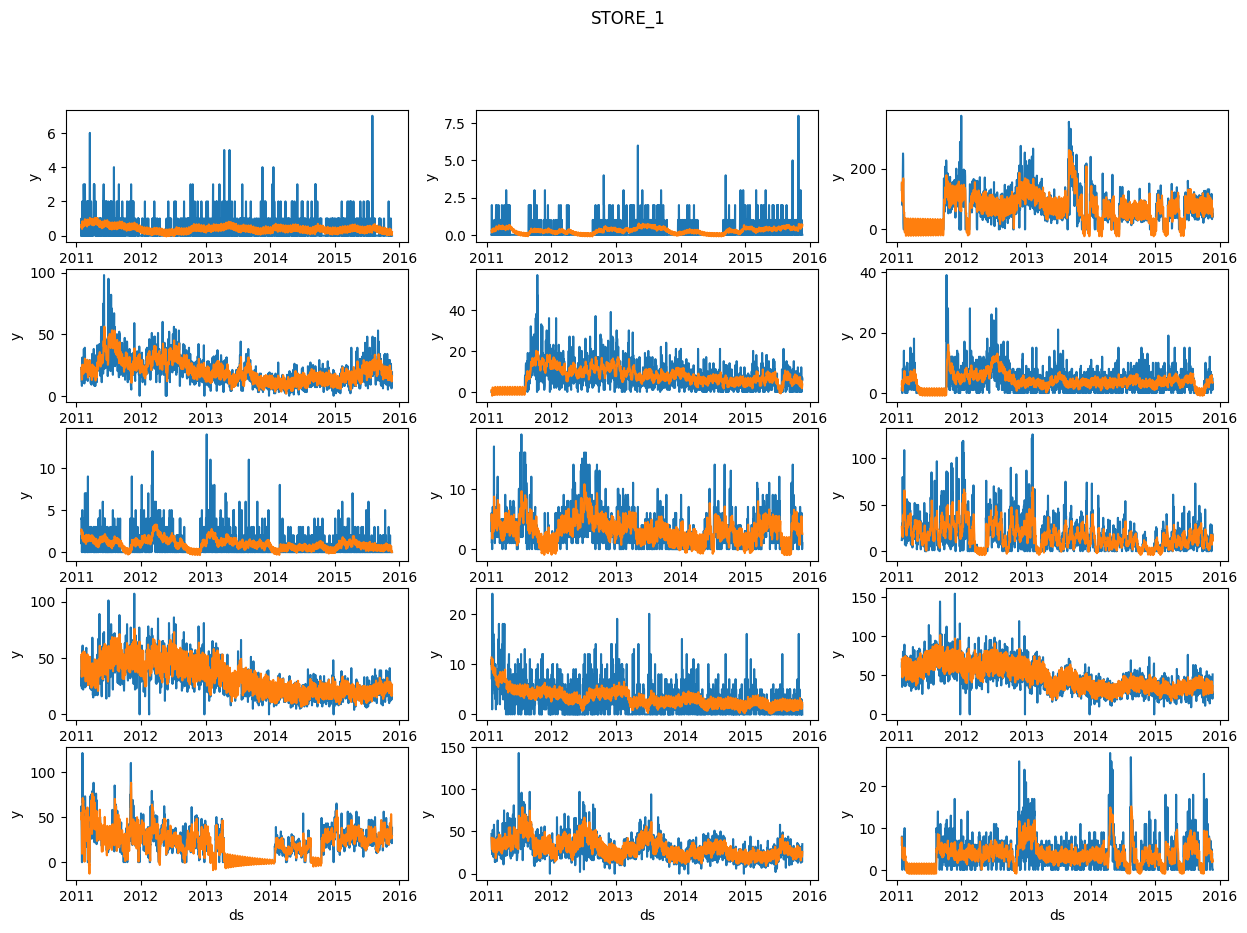

In [ ]:
fig,ax = plt.subplots(5,3,figsize=(15,10))

Y_fitted_df = Y_fitted_df.reset_index()
for i, art in enumerate(Y_fitted_df['unique_id'].unique()):
    data = Y_fitted_df[Y_fitted_df['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='AutoETS',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

,AutoETS
metric,
mae,7.506653
mape,0.322747


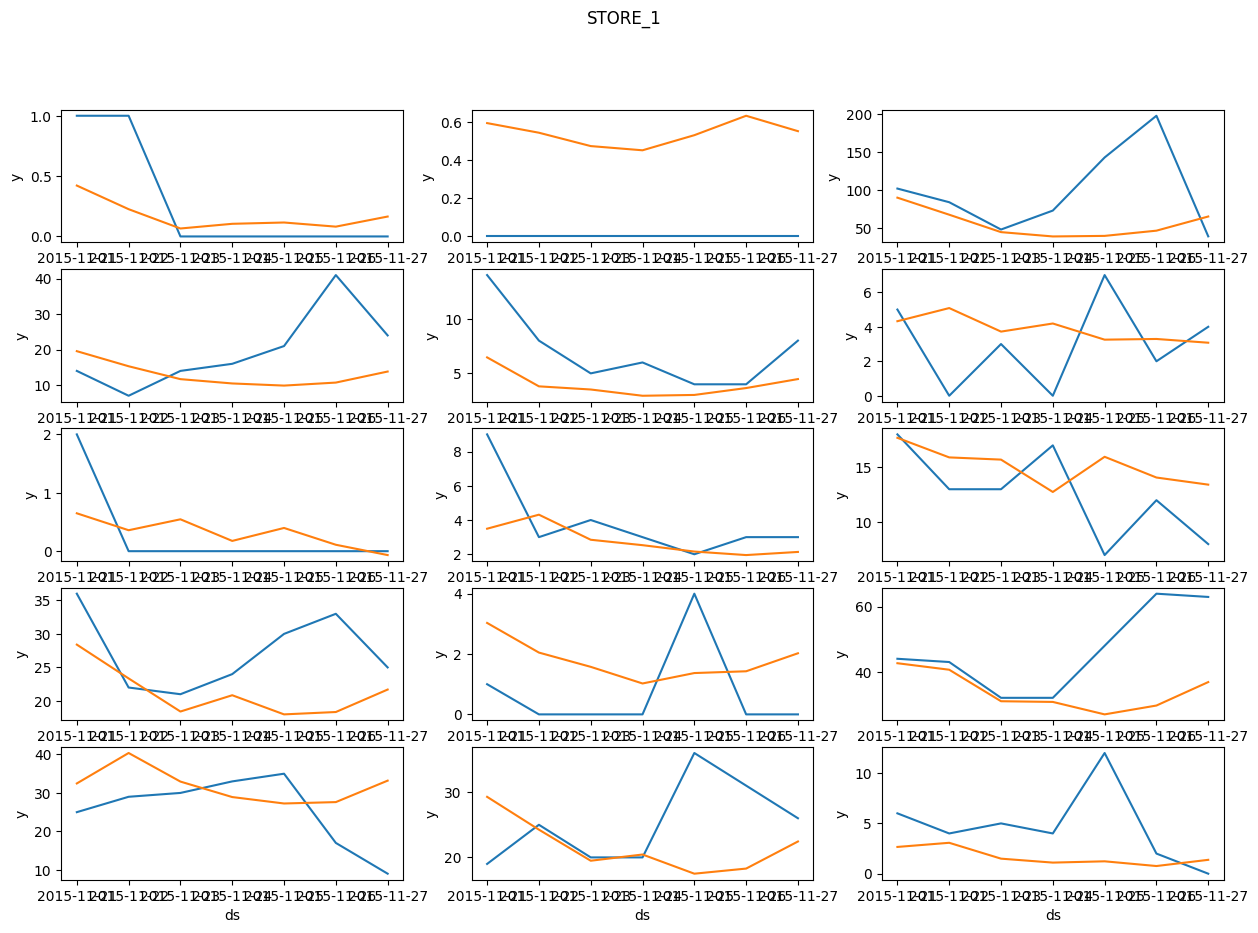

In [ ]:
Y_hat_df = fcst.forecast(h=7, fitted=True).reset_index()
Y_hat_df = Y_hat_df.merge(val_df, how='left', on=['unique_id', 'ds'])

eval_res = evaluate(Y_hat_df, metrics=metrics)
display(eval_res.groupby('metric').mean('ETS'))

fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(Y_hat_df['unique_id'].unique()):
    data = Y_hat_df[Y_hat_df['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='AutoETS',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

,AutoETS
metric,
mae,6.918602
mape,0.396684


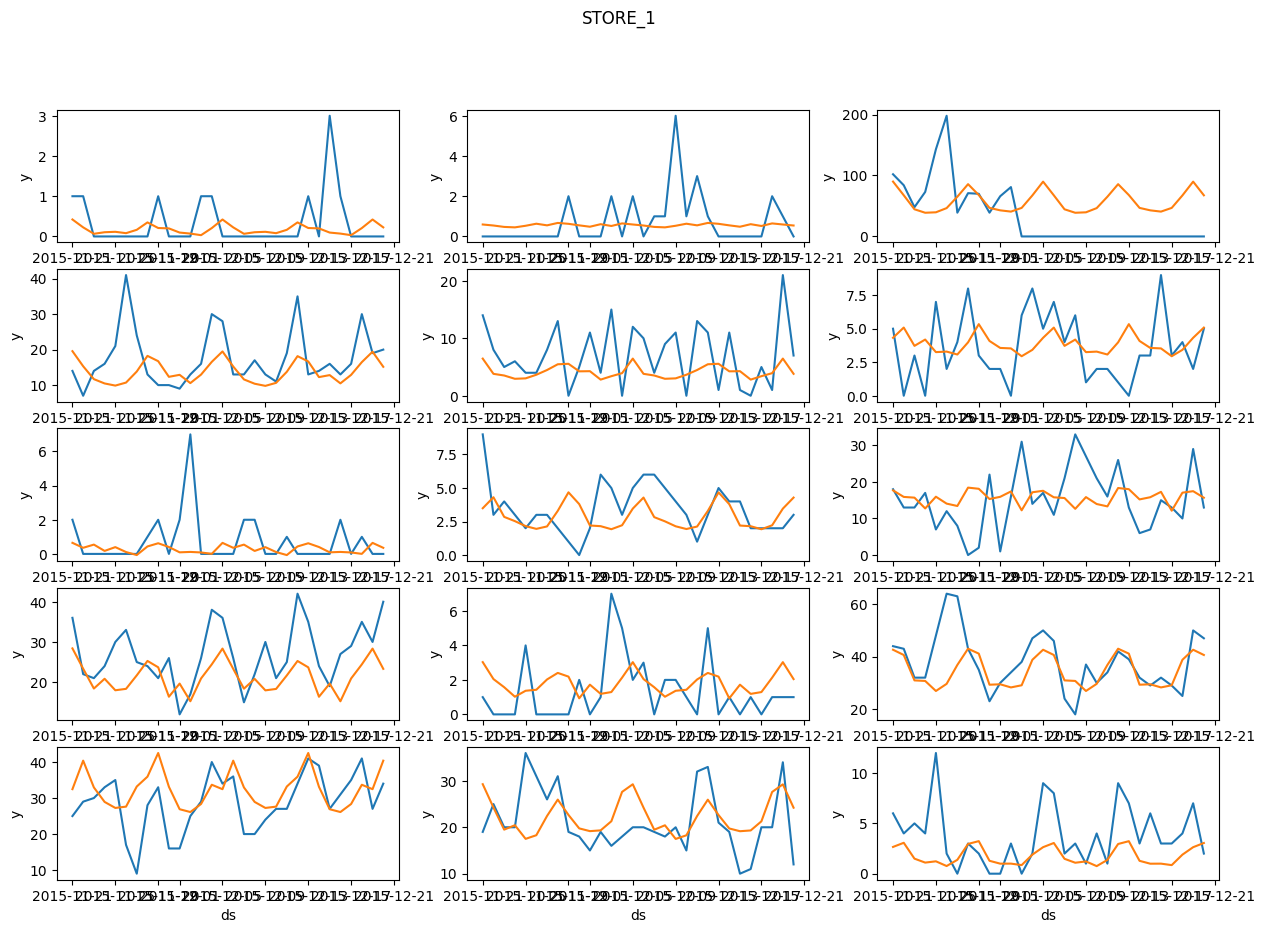

In [ ]:
Y_hat_df = fcst.forecast(h=30, fitted=True).reset_index()
Y_hat_df = Y_hat_df.merge(val_df, how='left', on=['unique_id', 'ds'])

eval_res = evaluate(Y_hat_df, metrics=metrics)
display(eval_res.groupby('metric').mean('ETS'))

fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(Y_hat_df['unique_id'].unique()):
    data = Y_hat_df[Y_hat_df['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='AutoETS',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

,AutoETS
metric,
mae,6.866103
mape,0.441333


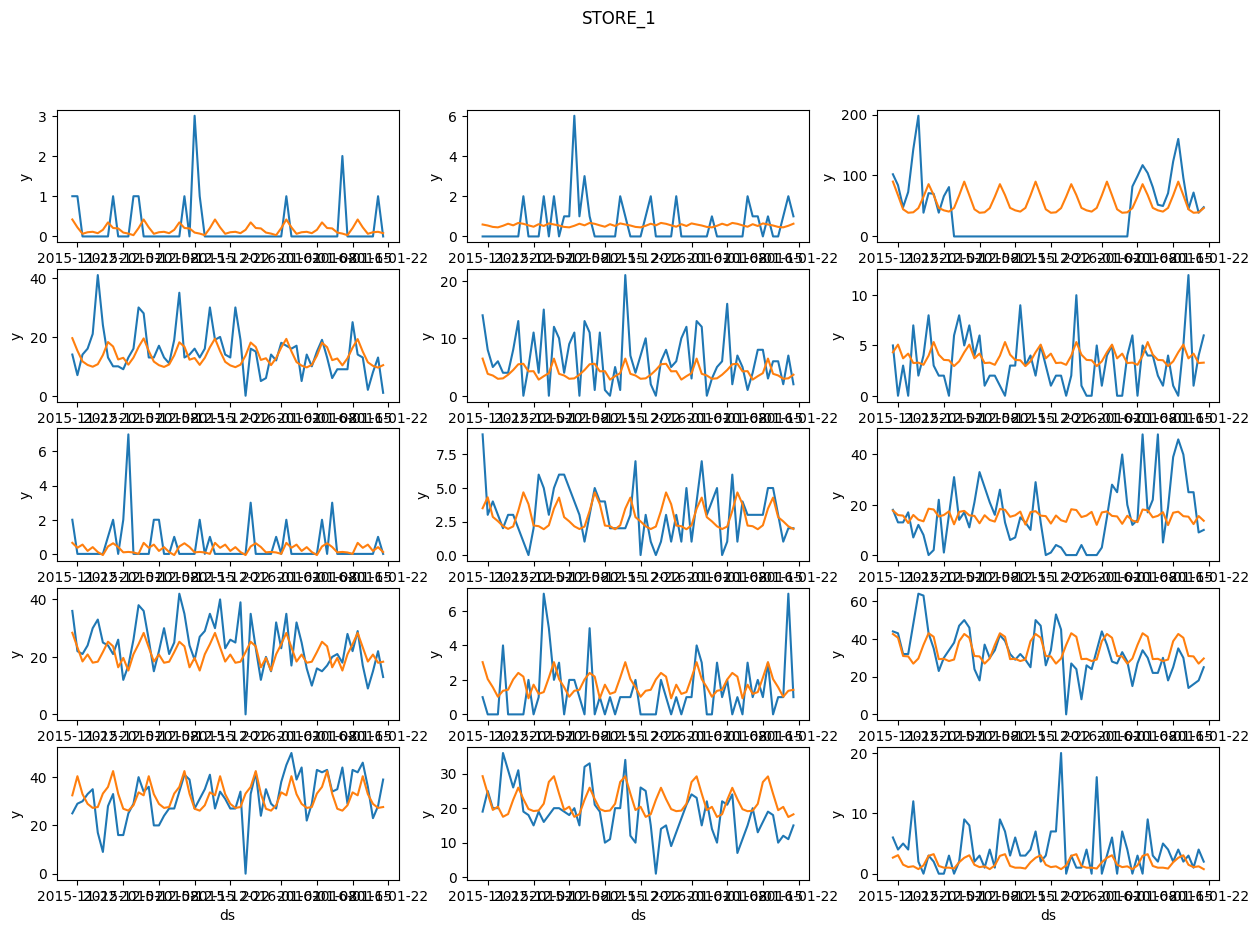

In [ ]:
Y_hat_df = fcst.forecast(h=valid_split, fitted=True).reset_index()
Y_hat_df = Y_hat_df.merge(val_df, how='left', on=['unique_id', 'ds'])

eval_res = evaluate(Y_hat_df, metrics=metrics)
display(eval_res.groupby('metric').mean('ETS'))

fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(Y_hat_df['unique_id'].unique()):
    data = Y_hat_df[Y_hat_df['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='AutoETS',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

In [ ]:
from prophet import Prophet

In [ ]:
train_df.head()

,y,ds
unique_id,,
STORE_1_064,0,2011-01-29
STORE_1_064,1,2011-01-30
STORE_1_064,0,2011-01-31
STORE_1_064,0,2011-02-01
STORE_1_064,0,2011-02-02


In [ ]:
model_dict = {}
train_preds = {}

train_df = train_df.reset_index()
for item in train_df['unique_id'].unique():
    data = train_df[train_df['unique_id']==item]
    model = Prophet()
    model.fit(data[['ds', 'y']])
    model_dict[item] = model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp248pjpu_/twgvpulp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp248pjpu_/he_wzv9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74565', 'data', 'file=/tmp/tmp248pjpu_/twgvpulp.json', 'init=/tmp/tmp248pjpu_/he_wzv9y.json', 'output', 'file=/tmp/tmp248pjpu_/prophet_modelbggudqry/prophet_model-20240607231117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp24

In [ ]:
forecasts_train = []
forecasts_val_k = []
forecasts_val_m = []
forecasts_val_w = []

# val_df = val_df.reset_index()
for k, v in model_dict.items():
    data_train = train_df[train_df['unique_id']==k]
    frcst_train = v.predict(data_train.drop(['y', 'index', 'unique_id'], axis=1))
    frcst_train['unique_id'] = k
    forecasts_train.append(frcst_train[['unique_id', 'ds', 'yhat']])

    future = val_df[val_df['unique_id']==k].drop(['y', 'index', 'unique_id'], axis=1)[:valid_split]
    forecast = v.predict(future)
    forecast['unique_id'] = k
    forecasts_val_k.append(forecast[['unique_id', 'ds', 'yhat']])

    future = val_df[val_df['unique_id']==k].drop(['y', 'index', 'unique_id'], axis=1)[:30]
    forecast = v.predict(future)
    forecast['unique_id'] = k
    forecasts_val_m.append(forecast[['unique_id', 'ds', 'yhat']])

    future = val_df[val_df['unique_id']==k].drop(['y', 'index', 'unique_id'], axis=1)[:7]
    forecast = v.predict(future)
    forecast['unique_id'] = k
    forecasts_val_w.append(forecast[['unique_id', 'ds', 'yhat']])

In [ ]:
train_preds = pd.concat(forecasts_train)
val_preds_k = pd.concat(forecasts_val_k)
val_preds_m = pd.concat(forecasts_val_m)
val_preds_w = pd.concat(forecasts_val_w)

In [ ]:
train_preds = train_preds.merge(train_df, how='left', on=['unique_id', 'ds']).drop('index', axis=1)
val_preds_k = val_preds_k.merge(val_df, how='left', on=['unique_id', 'ds']).drop(['index', 'level_0'], axis=1)
val_preds_m = val_preds_m.merge(val_df, how='left', on=['unique_id', 'ds']).drop(['index', 'level_0'], axis=1)
val_preds_w = val_preds_w.merge(val_df, how='left', on=['unique_id', 'ds']).drop(['index', 'level_0'], axis=1)

,yhat
metric,
mae,6.402124
mape,0.422845


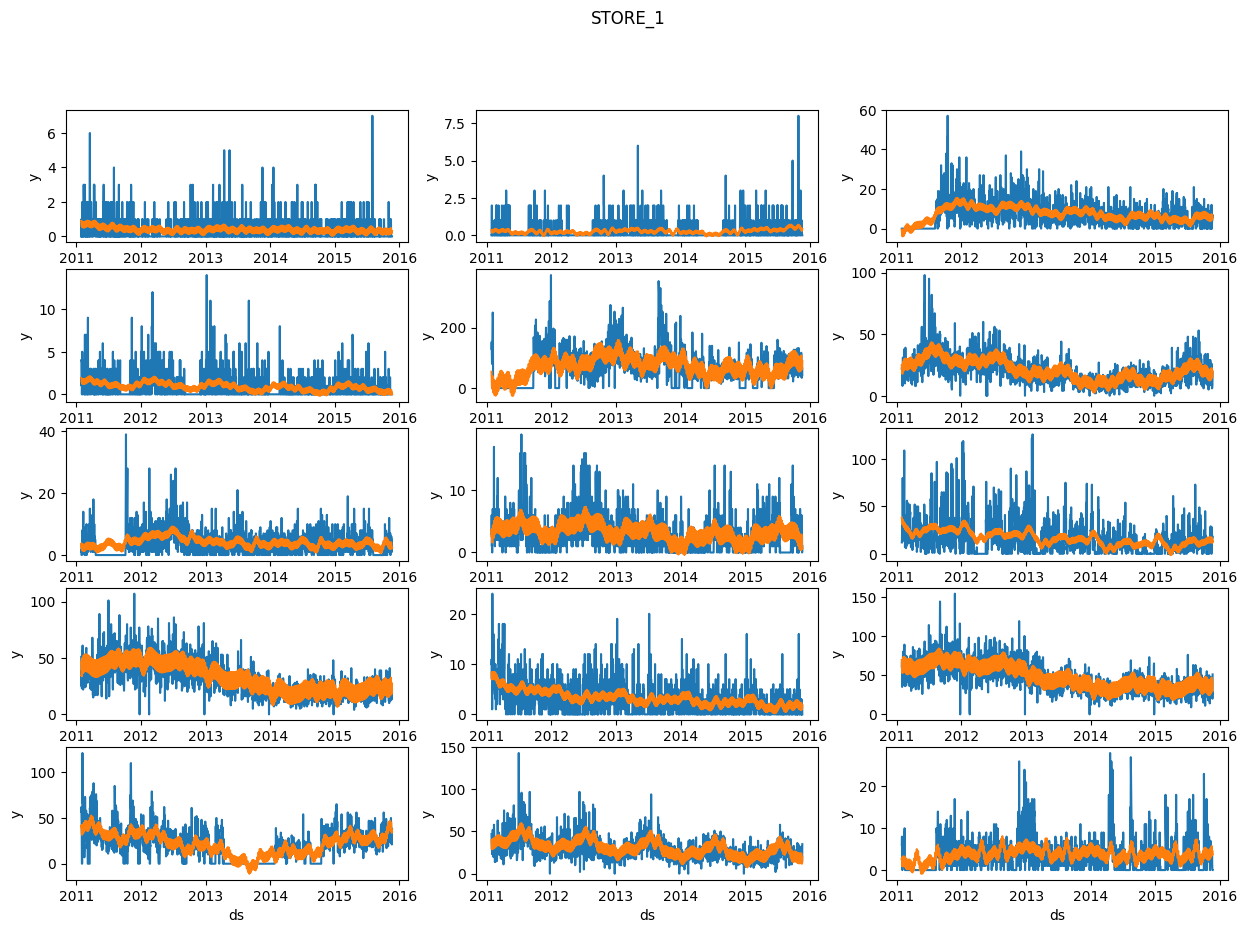

In [ ]:
eval_res = evaluate(train_preds, metrics=metrics)
display(eval_res.groupby('metric').mean('ETS'))

fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(train_preds['unique_id'].unique()):
    data = train_preds[train_preds['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='yhat',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

,yhat
metric,
mae,7.169143
mape,0.324724


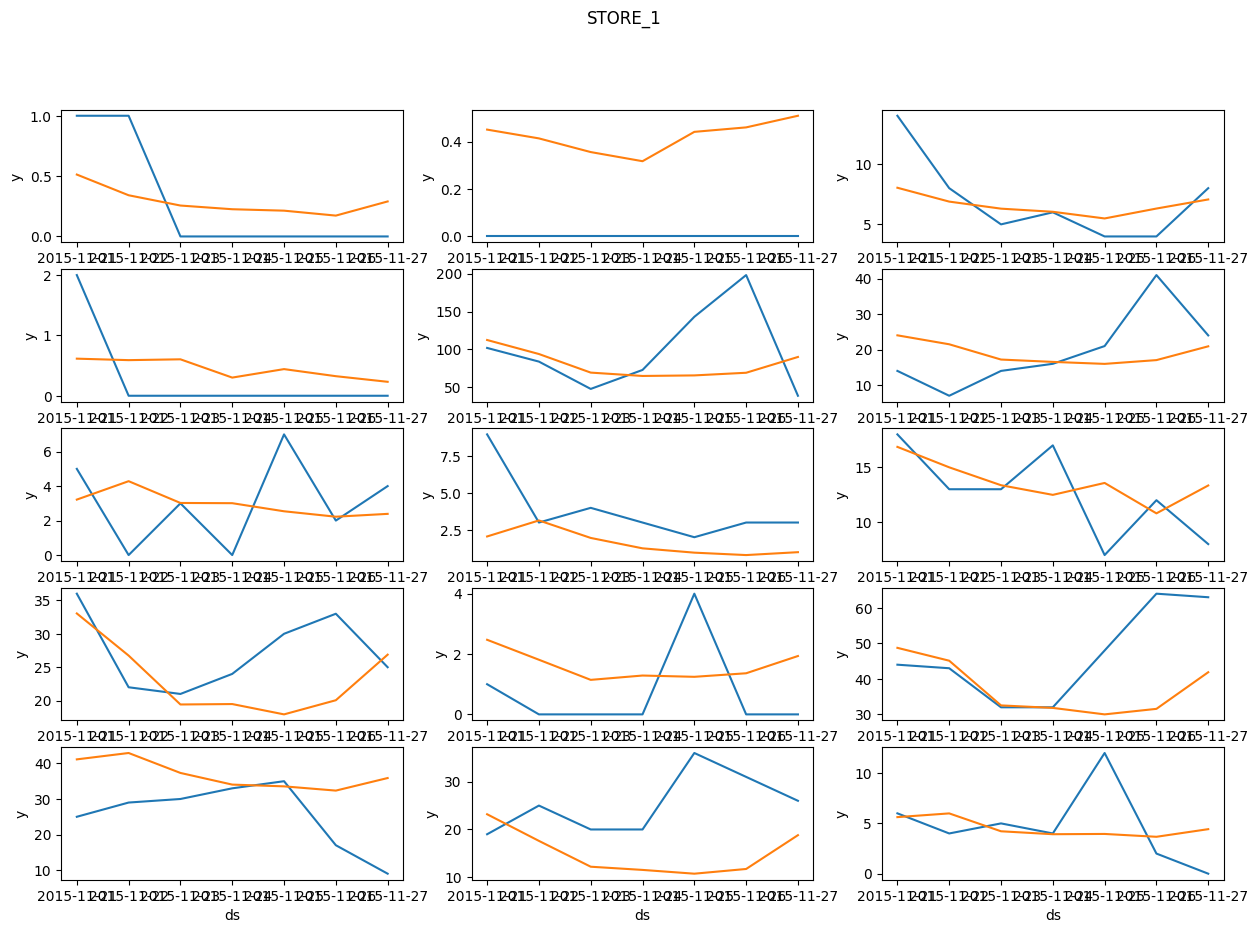

In [ ]:
eval_res = evaluate(val_preds_w, metrics=metrics)
display(eval_res.groupby('metric').mean('ETS'))

fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(val_preds_w['unique_id'].unique()):
    data = val_preds_w[val_preds_w['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='yhat',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

,yhat
metric,
mae,7.584707
mape,0.398983


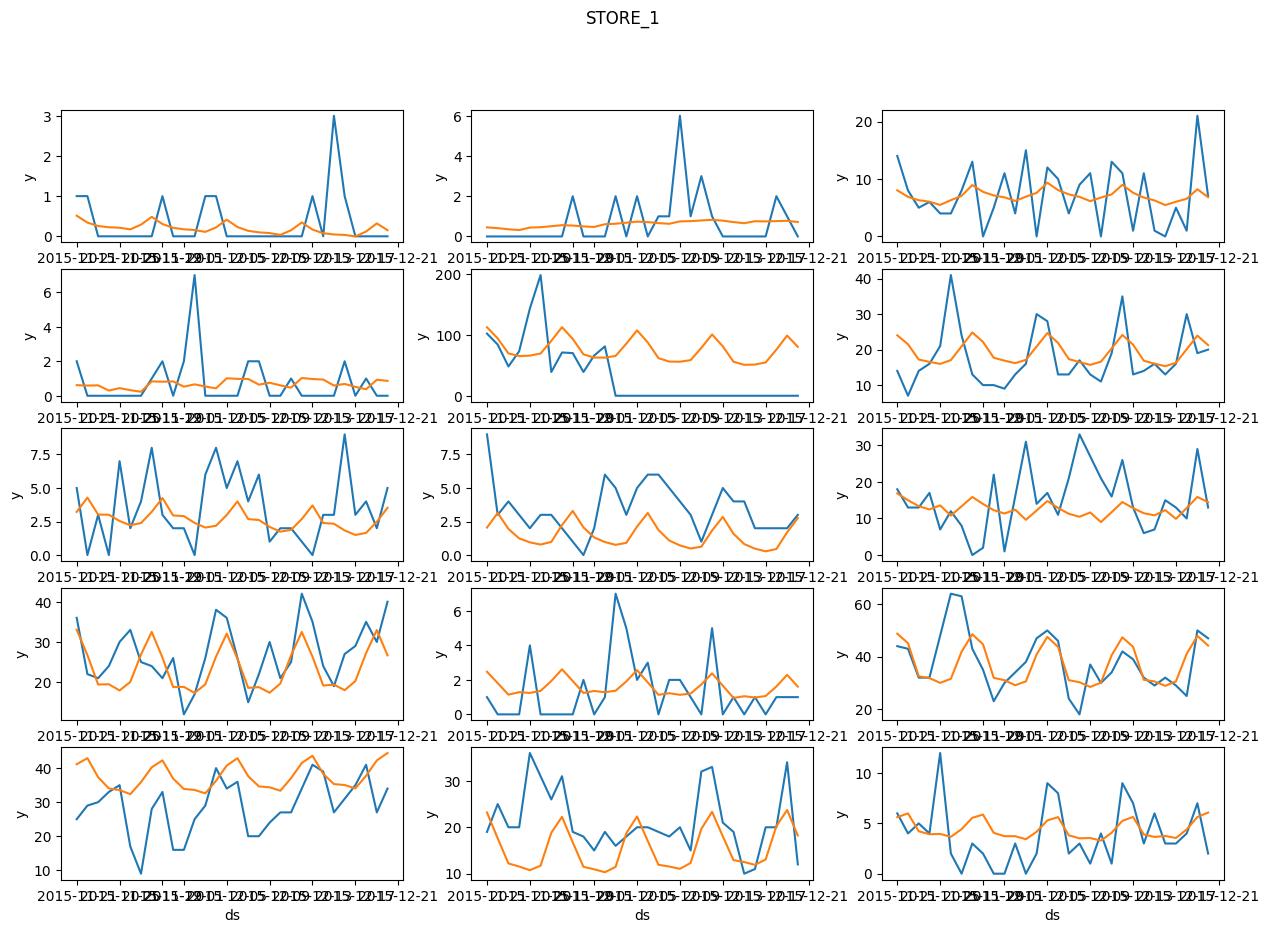

In [ ]:
eval_res = evaluate(val_preds_m, metrics=metrics)
display(eval_res.groupby('metric').mean('ETS'))

fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(val_preds_m['unique_id'].unique()):
    data = val_preds_m[val_preds_m['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='yhat',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()

,yhat
metric,
mae,7.575675
mape,0.454501


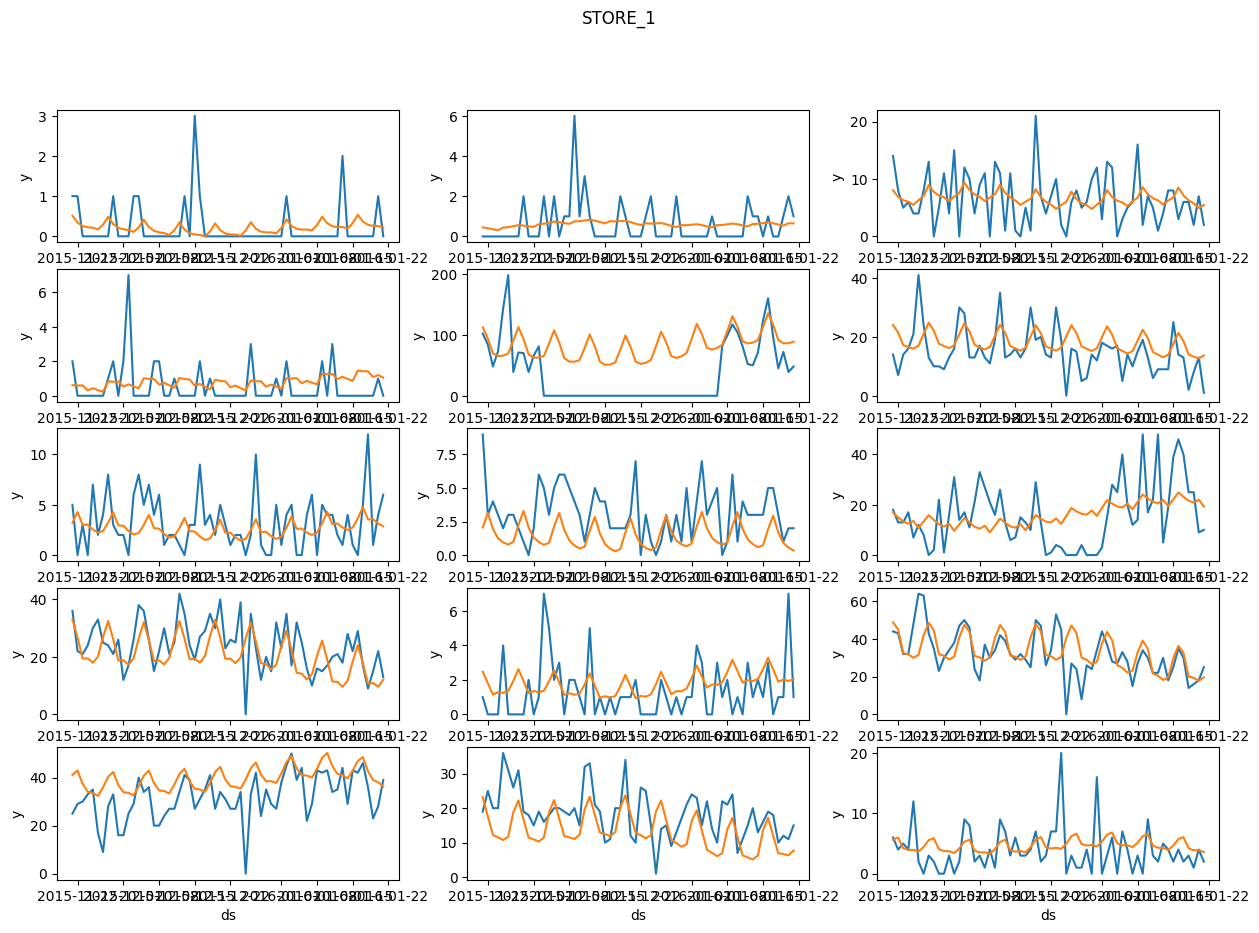

In [ ]:
eval_res = evaluate(val_preds_k, metrics=metrics)
display(eval_res.groupby('metric').mean('ETS'))

fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(val_preds_k['unique_id'].unique()):
    data = val_preds_k[val_preds_k['unique_id']==art]
    data.set_index('ds')
    sns.lineplot(data=data,
                 x='ds',y='y',ax = ax[i//3][i%3])
    sns.lineplot(data=data,
                 x='ds',y='yhat',ax = ax[i//3][i%3])
plt.suptitle(STORE_ID)
plt.show()